In [1]:
#知识点
#1.jieba库
#2.wordcloud


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import plotly.graph_objects as go

In [2]:
df0=pd.read_csv("D:/2022_py_code/05第五章/data/01sanya12345_dataset1.csv")

In [4]:
print(df0.info())#查看基本信息，是否有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184568 entries, 0 to 184567
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      184568 non-null  int64  
 1   orderAll        184568 non-null  float64
 2   order           184568 non-null  float64
 3   工单编号            184568 non-null  int64  
 4   工单分类            184567 non-null  object 
 5   工单来源            184567 non-null  object 
 6   来电时间            184567 non-null  object 
 7   来电类型            184567 non-null  object 
 8   工单标题            184567 non-null  object 
 9   工单内容            184567 non-null  object 
 10  工单状态            184567 non-null  object 
 11  是否延期            184568 non-null  object 
 12  序号              183977 non-null  float64
 13  处理时间            184567 non-null  object 
 14  处理环节            184567 non-null  object 
 15  处理单位            184179 non-null  object 
 16  处理描述            184567 non-null  object 
 17  extractAdd

In [6]:
print(df0.isnull().sum())
#查看各列的缺失值情况
#其中序号、extract Address的缺失值较多

Unnamed: 0            0
orderAll              0
order                 0
工单编号                  0
工单分类                  1
工单来源                  1
来电时间                  1
来电类型                  1
工单标题                  1
工单内容                  1
工单状态                  1
是否延期                  0
序号                  591
处理时间                  1
处理环节                  1
处理单位                389
处理描述                  1
extractAddress    53304
lon84             57783
lat84             57783
cluster               0
dtype: int64


In [17]:
#对每日平均工单量分析

In [8]:
df0_split=df0["来电时间"].str.split(' ',expand=True)
#用空格分列
#注意加上.str.

In [9]:
df0["来电日期"]=df0_split[0]
#将分列完的第一列命名为来电日期

In [10]:
df0["来电分时秒"]=df0_split[1]


In [13]:
date_statistics=df0["来电日期"].value_counts()
#统计每日来电数量

In [14]:
date_statistics1=date_statistics.sort_index()
#按照时间重新排序

In [15]:
print(date_statistics1.describe())

count     136.000000
mean     1357.110294
std       307.097708
min       613.000000
25%      1127.250000
50%      1447.000000
75%      1583.000000
max      1903.000000
Name: 来电日期, dtype: float64


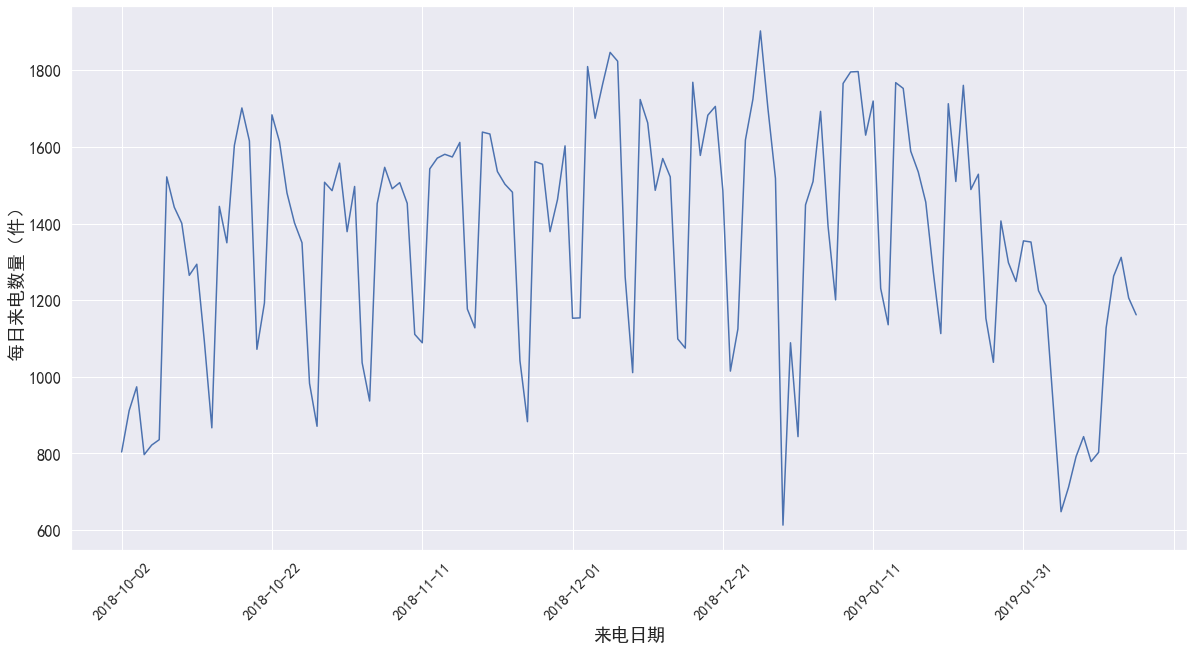

In [16]:
fig=plt.figure(figsize=(20,10))
sns.set(font_scale=1.5,font='SimHei')
date_statistics1.plot()
plt.xlabel("来电日期")
plt.ylabel("每日来电数量（件）")
plt.xticks(rotation=45,fontsize=15)#改变标签显示角度，防止重叠
plt.show()